# Predicción de la eficiencia energética de los edificios (aprendizaje supervisado)

### Contexto
Usted trabaja para una firma de arquitectura y su tarea es construir un modelo que prediga la calificación de eficiencia energética de los edificios basándose en características como el área de las paredes, el área del techo, la altura total, etc.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [8]:
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

In [3]:
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

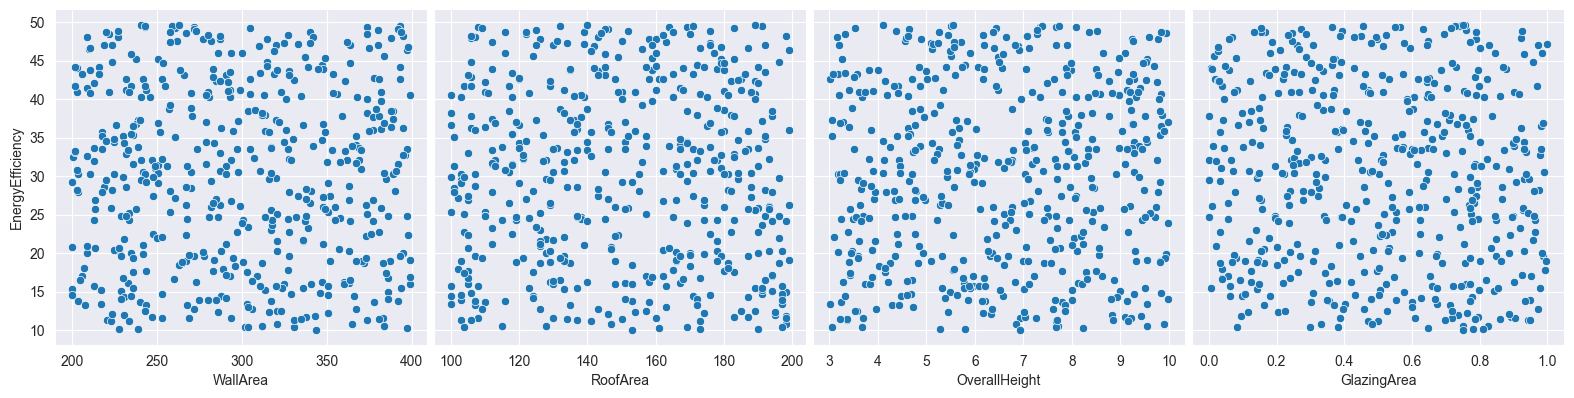

In [4]:
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 146.02051889440582


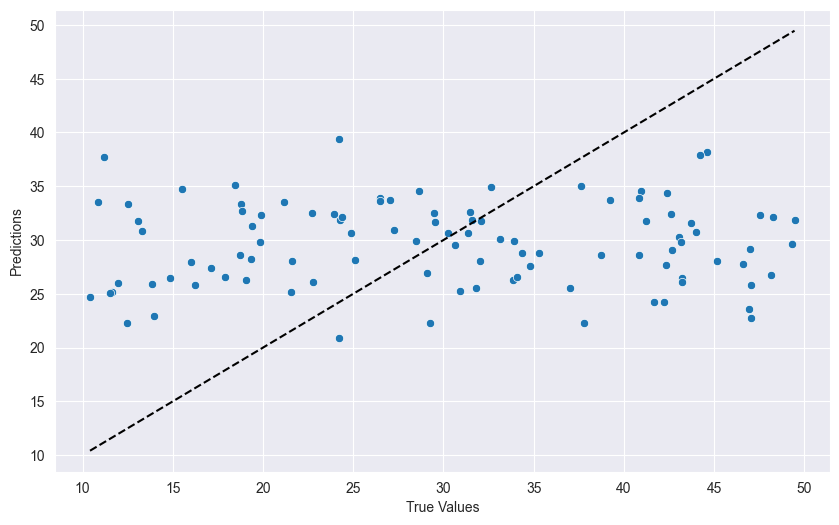

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Agrupamiento de vehículos (aprendizaje no supervisado)

### Contexto
Usted trabaja para una empresa automotriz y su tarea es agrupar los vehículos en grupos según sus características, como peso, tamaño del motor y caballos de fuerza.


In [20]:
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

In [21]:
X = df

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

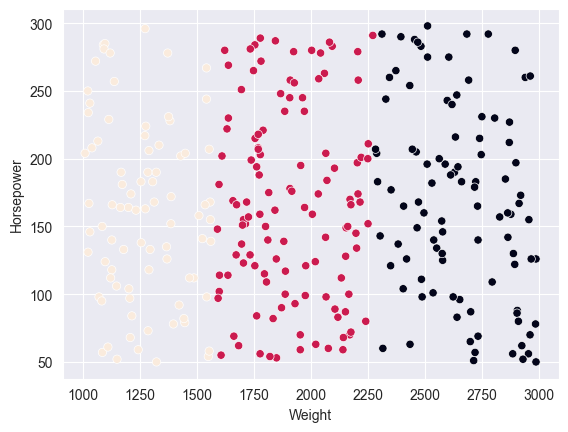

In [23]:
sns.scatterplot(x=df['Weight'], y=df['Horsepower'], c=kmeans.labels_)
plt.show()